# Task 2: Prediction using Unsupervised ML

# K-Means Clustering

K-Means Clustering is a Classification algorithm used to categorize given data into possible classes.

The famous Iris data is used here which have multiple 'independent Variable' and three 'dependent variables'.

##### Author : Ujjawal Tanwar

## Importing Required Libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## Importing Dataset

In [4]:
dataset = pd.read_csv("Iris.csv")
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Finding Optimum Number Of Clusters

The Elbow method uses Within Cluster Sum of Squares (WCSS) to find the optimal number of clusters, let's see how :

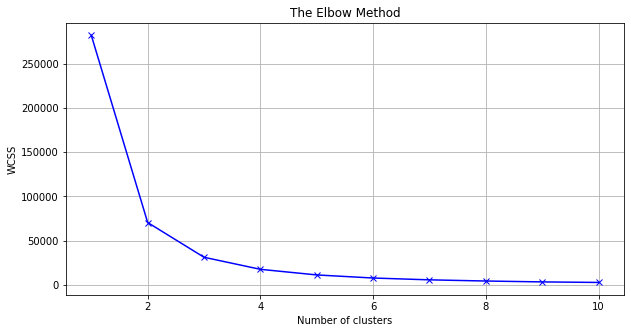

In [32]:
X = dataset.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Visual representation of Elbow Method    
plt.figure(figsize=(10,5))    
plt.plot(range(1, 11), wcss, 'bx-')
plt.grid(True)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

It is clear from the above graph of Elbow Method that the optimal number of clusters is 3, this is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

## Implementing K-Means Clustering Algorithm

In [7]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10)
y_kmeans = kmeans.fit_predict(X)

## Visualising Clusters on Graph

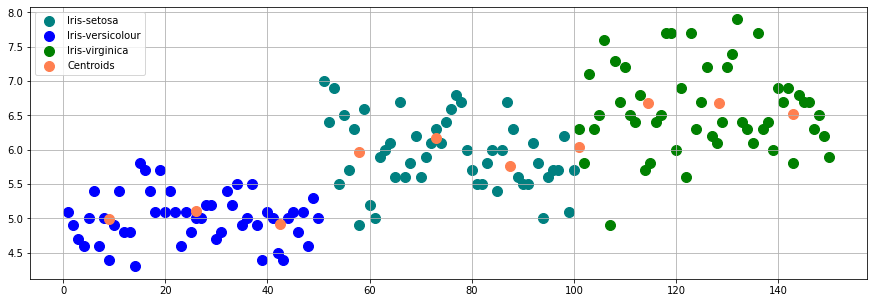

In [34]:
plt.figure(figsize=(15,5))

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'teal', label = 'Iris-setosa')

plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')

plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

plt.grid(True)

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, 
            c = 'coral', label = 'Centroids')

plt.legend()

plt.show()
